In [1]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis

# Membaca citra grayscale
image = cv2.imread('Reva1.jpeg', cv2.IMREAD_GRAYSCALE)

# Menghitung statistik dasar
mean = np.mean(image)
std_dev = np.std(image)
variance = np.var(image)
skewness = skew(image.ravel())
kurtosis_value = kurtosis(image.ravel())

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis_value)

Mean: 116.25236875
Standard Deviation: 47.924086678541485
Variance: 2296.7180839723574
Skewness: 0.05556383927011632
Kurtosis: -0.011963136559125509


In [2]:
from PIL import Image
import numpy as np

def image_statistics(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert image to numpy array
    image_array = np.array(image)

    # Calculate image statistics
    mean_color = image_array.mean(axis=(0, 1))  # Mean color (per channel)
    std_color = image_array.std(axis=(0, 1))    # Standard deviation (per channel)
    min_color = image_array.min(axis=(0, 1))    # Minimum color value (per channel)
    max_color = image_array.max(axis=(0, 1))    # Maximum color value (per channel)
    image_size = image_array.shape[:2]          # Size (height, width)
    num_pixels = image_array.size               # Total number of pixels

    # Display statistics
    print("Mean Color (per channel):", mean_color)
    print("Standard Deviation (per channel):", std_color)
    print("Minimum Color Value (per channel):", min_color)
    print("Maximum Color Value (per channel):", max_color)
    print("Image Size (height, width):", image_size)
    print("Total Number of Pixels:", num_pixels)

# Example usage
image_statistics('Reva1.jpeg')


Mean Color (per channel): [127.24173646 112.79509792 105.18813698]
Standard Deviation (per channel): [51.56416731 47.96010338 47.9093554 ]
Minimum Color Value (per channel): [0 0 0]
Maximum Color Value (per channel): [255 255 255]
Image Size (height, width): (1600, 1200)
Total Number of Pixels: 5760000


In [3]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_image_statistics(image_path):
    # Membaca citra berwarna
    image = cv2.imread(image_path)
    if image is None:
        print("Citra tidak dapat dibaca.")
        return
    
    # Konversi ke format RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Inisialisasi hasil statistik untuk setiap channel warna
    stats = {
        'mean': [],
        'std_dev': [],
        'skewness': [],
        'kurtosis': []
    }
    
    # Menghitung statistik per channel warna (R, G, B)
    for i in range(3):  # 0: R, 1: G, 2: B
        channel = image[:, :, i].flatten()
        
        # Rerata
        mean_val = np.mean(channel)
        stats['mean'].append(mean_val)
        
        # Deviasi standar
        std_dev_val = np.std(channel)
        stats['std_dev'].append(std_dev_val)
        
        # Skewness
        skewness_val = skew(channel)
        stats['skewness'].append(skewness_val)
        
        # Kurtosis
        kurtosis_val = kurtosis(channel)
        stats['kurtosis'].append(kurtosis_val)
    
    # Menampilkan hasil
    print("Statistik Citra per Channel (R, G, B):")
    print(f"Mean: {stats['mean']}")
    print(f"Standard Deviation: {stats['std_dev']}")
    print(f"Skewness: {stats['skewness']}")
    print(f"Kurtosis: {stats['kurtosis']}")

# Contoh penggunaan
image_path = 'Bunga Merah.jpeg'
calculate_image_statistics(image_path)


Statistik Citra per Channel (R, G, B):
Mean: [145.37026983333334, 107.99195816666666, 111.71485266666667]
Standard Deviation: [56.66987906801861, 61.39537146367185, 51.90248824476815]
Skewness: [0.5423337601995436, -0.04754639249215112, 0.6594889021100445]
Kurtosis: [-0.6511221447278217, -0.45870316808112044, -0.06949170921409564]


In [3]:
import cv2
import numpy as np

# Fungsi untuk menghitung mean 
def calculate_mean(channel):
    total = np.sum(channel)
    num_pixels = channel.size
    mean = total / num_pixels
    return mean

# Fungsi untuk menghitung varians 
def calculate_variance(channel, mean):
    total = np.sum((channel - mean) ** 2)
    num_pixels = channel.size
    variance = total / num_pixels
    return variance

# Fungsi untuk menghitung skewness 
def calculate_skewness(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 3)
    num_pixels = channel.size
    skewness = total / num_pixels
    return skewness

# Fungsi untuk menghitung kurtosis 
def calculate_kurtosis(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 4)
    num_pixels = channel.size
    kurtosis = total / num_pixels - 3  # Excess kurtosis
    return kurtosis

# Membaca citra berwarna
image = cv2.imread('Bunga Merah.jpeg')
blue_channel, green_channel, red_channel = cv2.split(image)

# Menghitung statistik untuk setiap kanal 
def calculate_statistics_manual(channel):
    # Mean
    mean = calculate_mean(channel)
    
    # Variance
    variance = calculate_variance(channel, mean)
    
    # Standard Deviation
    std_deviation = np.sqrt(variance)
    
    # Skewness
    skewness = calculate_skewness(channel, mean, std_deviation)
    
    # Kurtosis
    kurtosis = calculate_kurtosis(channel, mean, std_deviation)
    
    return mean, variance, std_deviation, skewness, kurtosis

# Menghitung statistik untuk kanal biru
mean_blue, var_blue, std_blue, skew_blue, kurt_blue = calculate_statistics_manual(blue_channel)

# Menghitung statistik untuk kanal hijau
mean_green, var_green, std_green, skew_green, kurt_green = calculate_statistics_manual(green_channel)

# Menghitung statistik untuk kanal merah
mean_red, var_red, std_red, skew_red, kurt_red = calculate_statistics_manual(red_channel)

# Menampilkan hasil
print("Blue Channel:")
print(f"Mean Intensity: {mean_blue}")
print(f"Variance: {var_blue}")
print(f"Standard Deviation: {std_blue}")
print(f"Skewness: {skew_blue}")
print(f"Kurtosis: {kurt_blue}\n")

print("Green Channel:")
print(f"Mean Intensity: {mean_green}")
print(f"Variance: {var_green}")
print(f"Standard Deviation: {std_green}")
print(f"Skewness: {skew_green}")
print(f"Kurtosis: {kurt_green}\n")

print("Red Channel:")
print(f"Mean Intensity: {mean_red}")
print(f"Variance: {var_red}")
print(f"Standard Deviation: {std_red}")
print(f"Skewness: {skew_red}")
print(f"Kurtosis: {kurt_red}")


Blue Channel:
Mean Intensity: 111.71485266666667
Variance: 2693.868285998296
Standard Deviation: 51.90248824476815
Skewness: 0.6594889021100457
Kurtosis: -0.06949170921409697

Green Channel:
Mean Intensity: 107.99195816666666
Variance: 3769.3916371622518
Standard Deviation: 61.39537146367185
Skewness: -0.04754639249215148
Kurtosis: -0.45870316808112666

Red Channel:
Mean Intensity: 145.37026983333334
Variance: 3211.475193583854
Standard Deviation: 56.66987906801861
Skewness: 0.5423337601995438
Kurtosis: -0.6511221447278186


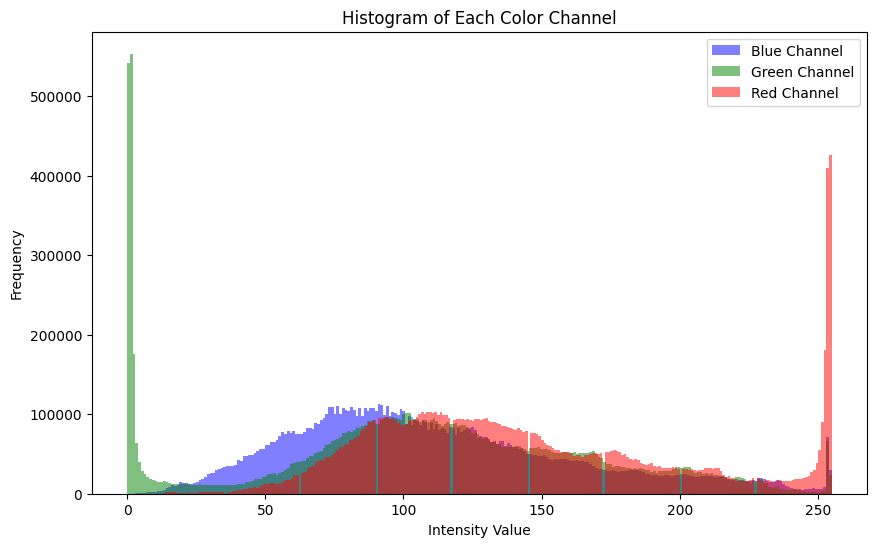

In [1]:
import cv2
import matplotlib.pyplot as plt

# Membaca citra berwarna
image = cv2.imread('Bunga Merah.jpeg')

# Memisahkan kanal B, G, dan R
blue_channel, green_channel, red_channel = cv2.split(image)

# Membuat histogram untuk setiap kanal
plt.figure(figsize=(10, 6))
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red Channel')
plt.title("Histogram of Each Color Channel")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Skewness & Kurtosis


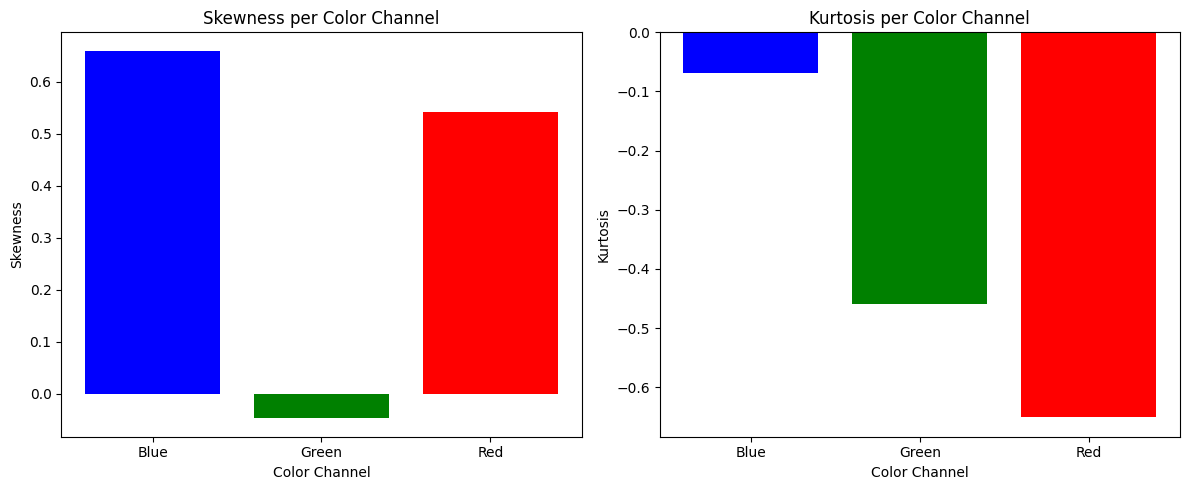

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Membaca citra berwarna
image = cv2.imread('Bunga Merah.jpeg')
# Memisahkan kanal B, G, dan R
blue_channel, green_channel, red_channel = cv2.split(image)

# Menghitung skewness dan kurtosis untuk setiap kanal
def calculate_skewness_kurtosis(channel):
    skewness = skew(channel.ravel())
    kurt = kurtosis(channel.ravel())
    return skewness, kurt

# Menghitung nilai skewness dan kurtosis untuk tiap kanal
skew_blue, kurt_blue = calculate_skewness_kurtosis(blue_channel)
skew_green, kurt_green = calculate_skewness_kurtosis(green_channel)
skew_red, kurt_red = calculate_skewness_kurtosis(red_channel)

# Mengumpulkan nilai untuk plot
skewness_values = [skew_blue, skew_green, skew_red]
kurtosis_values = [kurt_blue, kurt_green, kurt_red]
channels = ['Blue', 'Green', 'Red']

# Membuat plot untuk Skewness
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(channels, skewness_values, color=['blue', 'green', 'red'])
plt.title("Skewness per Color Channel")
plt.ylabel("Skewness")
plt.xlabel("Color Channel")

# Membuat plot untuk Kurtosis
plt.subplot(1, 2, 2)
plt.bar(channels, kurtosis_values, color=['blue', 'green', 'red'])
plt.title("Kurtosis per Color Channel")
plt.ylabel("Kurtosis")
plt.xlabel("Color Channel")

plt.tight_layout()
plt.show()


Blue Channel:
Mean Intensity: 107.1390336225236
Variance: 4242.493537787696
Standard Deviation: 65.13442667121356
Skewness: -0.10280773026154982
Kurtosis: -1.2746782789297046

Green Channel:
Mean Intensity: 132.8582978078048
Variance: 2737.692908497303
Standard Deviation: 52.32296731357371
Skewness: -0.0936257138971653
Kurtosis: -0.6714817987866333

Red Channel:
Mean Intensity: 133.69132990127642
Variance: 4230.845628858107
Standard Deviation: 65.04495083292866
Skewness: 0.14168903576266487
Kurtosis: -0.7652554144444466


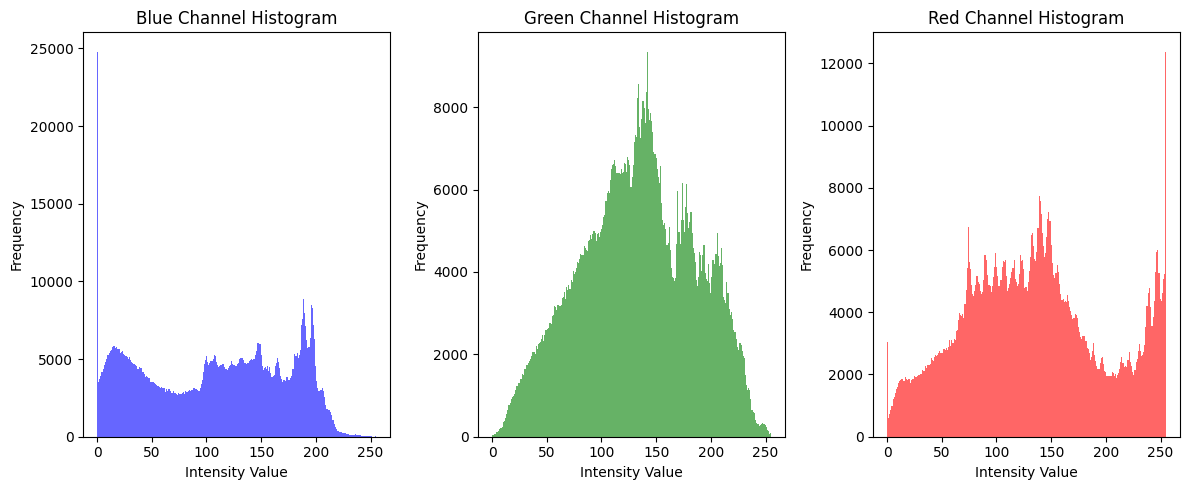

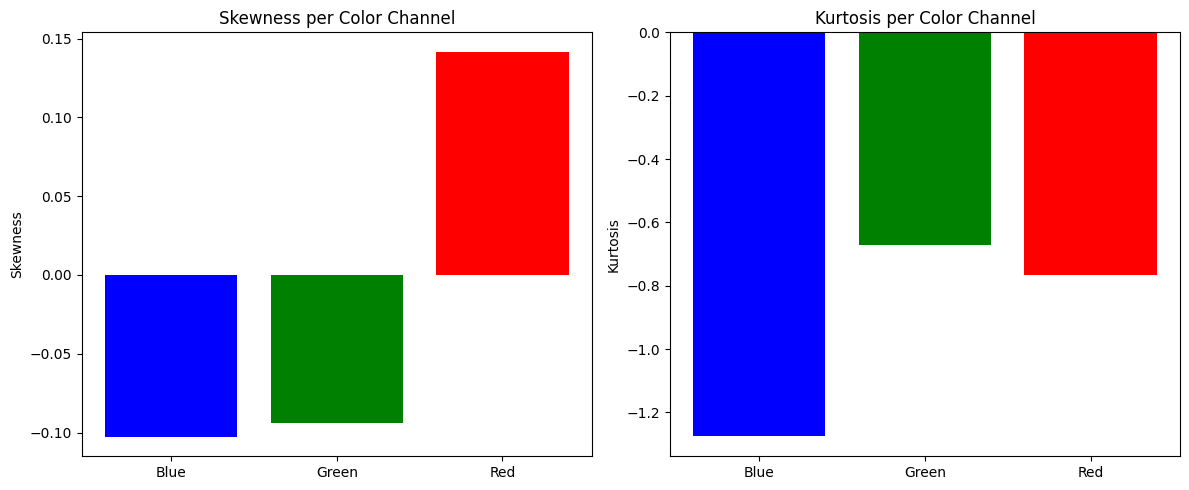

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung mean 
def calculate_mean(channel):
    total = np.sum(channel)
    num_pixels = channel.size
    mean = total / num_pixels
    return mean

# Fungsi untuk menghitung varians 
def calculate_variance(channel, mean):
    total = np.sum((channel - mean) ** 2)
    num_pixels = channel.size
    variance = total / num_pixels
    return variance

# Fungsi untuk menghitung skewness 
def calculate_skewness(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 3)
    num_pixels = channel.size
    skewness = total / num_pixels
    return skewness

# Fungsi untuk menghitung kurtosis 
def calculate_kurtosis(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 4)
    num_pixels = channel.size
    kurtosis = total / num_pixels - 3  # Excess kurtosis
    return kurtosis

# Membaca citra berwarna
image = cv2.imread('sunset.jpeg')
blue_channel, green_channel, red_channel = cv2.split(image)

# Menghitung statistik untuk setiap kanal 
def calculate_statistics_manual(channel):
    # Mean
    mean = calculate_mean(channel)
    
    # Variance
    variance = calculate_variance(channel, mean)
    
    # Standard Deviation
    std_deviation = np.sqrt(variance)
    
    # Skewness
    skewness = calculate_skewness(channel, mean, std_deviation)
    
    # Kurtosis
    kurtosis = calculate_kurtosis(channel, mean, std_deviation)
    
    return mean, variance, std_deviation, skewness, kurtosis

# Menghitung statistik untuk kanal biru
mean_blue, var_blue, std_blue, skew_blue, kurt_blue = calculate_statistics_manual(blue_channel)

# Menghitung statistik untuk kanal hijau
mean_green, var_green, std_green, skew_green, kurt_green = calculate_statistics_manual(green_channel)

# Menghitung statistik untuk kanal merah
mean_red, var_red, std_red, skew_red, kurt_red = calculate_statistics_manual(red_channel)

# Menampilkan hasil
print("Blue Channel:")
print(f"Mean Intensity: {mean_blue}")
print(f"Variance: {var_blue}")
print(f"Standard Deviation: {std_blue}")
print(f"Skewness: {skew_blue}")
print(f"Kurtosis: {kurt_blue}\n")

print("Green Channel:")
print(f"Mean Intensity: {mean_green}")
print(f"Variance: {var_green}")
print(f"Standard Deviation: {std_green}")
print(f"Skewness: {skew_green}")
print(f"Kurtosis: {kurt_green}\n")

print("Red Channel:")
print(f"Mean Intensity: {mean_red}")
print(f"Variance: {var_red}")
print(f"Standard Deviation: {std_red}")
print(f"Skewness: {skew_red}")
print(f"Kurtosis: {kurt_red}")

# Menampilkan Histogram
plt.figure(figsize=(12, 5))

# Histogram untuk Blue Channel
plt.subplot(1, 3, 1)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.6)
plt.title("Blue Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

# Histogram untuk Green Channel
plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.6)
plt.title("Green Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

# Histogram untuk Red Channel
plt.subplot(1, 3, 3)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.6)
plt.title("Red Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot Skewness dan Kurtosis
channels = ['Blue', 'Green', 'Red']
skewness_values = [skew_blue, skew_green, skew_red]
kurtosis_values = [kurt_blue, kurt_green, kurt_red]

plt.figure(figsize=(12, 5))

# Grafik Skewness
plt.subplot(1, 2, 1)
plt.bar(channels, skewness_values, color=['blue', 'green', 'red'])
plt.title("Skewness per Color Channel")
plt.ylabel("Skewness")

# Grafik Kurtosis
plt.subplot(1, 2, 2)
plt.bar(channels, kurtosis_values, color=['blue', 'green', 'red'])
plt.title("Kurtosis per Color Channel")
plt.ylabel("Kurtosis")

plt.tight_layout()
plt.show()
